# Outlier detection and removal: z score, standard deviation 

**Topics**

1. Load Kaggle dataset
2. Plot histogram and ball curve
3. Use 3 standard deviation to remove outliers
4. Use Z score to remove outliers
5. Exercise

# Coding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10,6]

In [2]:
df = pd.read_csv('03_heights.csv')
df.sample(5)

,gender,height
6938,Female,66.475461
8358,Female,61.691544
5934,Female,59.181731
1475,Male,69.735442
2162,Male,69.994290


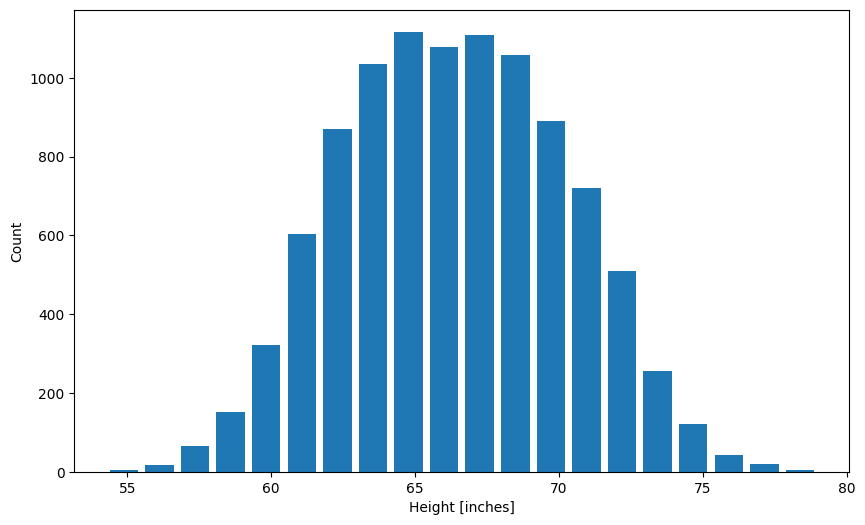

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height [inches]')
plt.ylabel('Count')
plt.show()

In [4]:
# search math.fun.com data normal distribution is to understand this

In [5]:
from scipy.stats import norm
import numpy as np

In [6]:
df.height.min()

np.float64(54.26313333)

In [7]:
df.height.max()

np.float64(78.99874235)

In [8]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

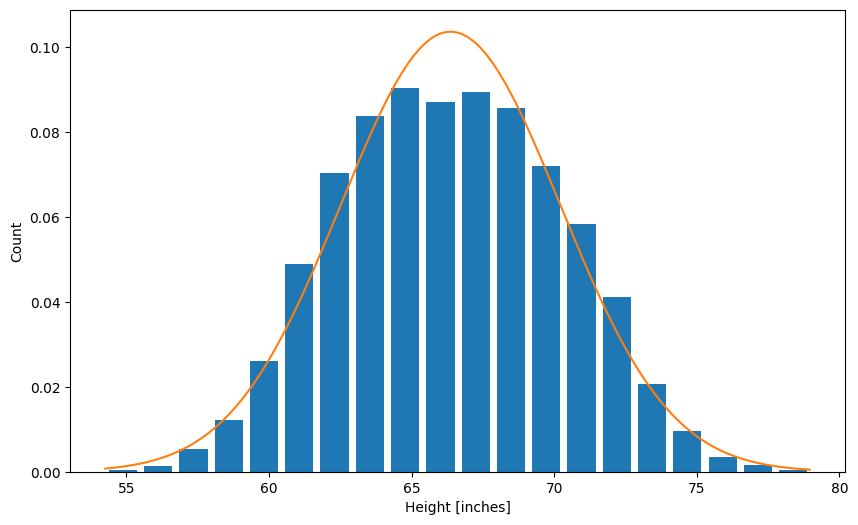

In [9]:
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height [inches]')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [10]:
# Mean and standard deviation

In [11]:
df.height.mean()

np.float64(66.367559754866)

In [12]:
df.height.std() #Std shows that how far a way the value is from the mean value

np.float64(3.847528120795573)

In [13]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

np.float64(77.91014411725271)

In [14]:
# any value greater than 77.91 will be an outlier

In [15]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

np.float64(54.824975392479274)

In [16]:
# anything lower than 54.8 will be an outlier

In [17]:
df[ (df.height > upper_limit) | (df.height < lower_limit) ]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [18]:
df_no_outlier = df[ (df.height < upper_limit) & (df.height > lower_limit)]
df_no_outlier.shape

(9993, 2)

In [19]:
df.shape[0] - df_no_outlier.shape[0]

7

# Z-Score

**Outlier detection and removal using z-score**

1. Z-Score is the way to achieve same thing that we did in normal distribution.
2. Z-Score indicates how many standard deviation away a datapoint is.
3. For example in our case mean is 66.37 and STD is 3.84
4. If the value of a datapoint is 77.91 then Z-score for that is 3 because Z-score is the std away (77.91 = 66.37 + 3*3.84).

**Calculate the Z-Score**

**Formula**

$Z = \frac{x-u}{o} $

u = mean

o = standard devitaion

In [21]:
# calculate z-score

df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [22]:
# how we get the z-score 1.943964

# (height - mean) / std

(73.847017 - 66.37) / 3.84

1.9471398437499974

In [23]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [24]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [25]:
df[ (df.zscore < -3) | (df.zscore > 3) ]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [26]:
df_n_out = df[ (df.zscore>-3) & (df.zscore<3) ]
df_n_out.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [27]:
df.shape[0] - df_n_out.shape[0]

7

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)